In [1]:
import pandas as pd
import numpy as np
import pickle
import eli5

In [2]:
data = pd.read_csv(r"E:\Dropbox\Projects\rocket_league_analytics\data\xg\combined.csv")
data = data.rename(columns={'Unnamed: 0': 'idx'})
data.head()

,idx,frame,time,goal,is_orange,distanceToGoal,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,...,opp_2_rot_x,opp_2_rot_y,opp_2_rot_z,opp_2_ball_cam,opp_2_boost,opp_2_boost_active,opp_2_jump_active,opp_2_double_jump_active,opp_2_dodge_active,opp_2_boost_collect
0,0,2710,92.0,True,0,966.584399,-1599.369995,4477.009766,110.500000,25402.299805,...,0.903946,0.027020,1.592472,True,66.000000,False,42,4,32,NaN
1,1,3512,112.0,True,0,1470.603582,-1144.359985,3690.520020,135.089996,17386.199951,...,0.016712,0.444989,-0.000108,True,172.986796,True,10,4,8,NaN
2,2,3951,119.0,False,0,3682.619050,527.619995,1743.680054,583.169983,-316.900005,...,-0.280303,1.446455,0.955215,True,129.077247,True,4,False,False,NaN
3,3,5116,161.0,False,1,3767.431118,-2487.120117,3482.280029,95.889999,17407.299805,...,-0.864975,-1.056242,-0.277431,True,125.000000,False,24,False,17,NaN
4,4,5362,170.0,True,0,1666.394692,97.870003,3802.429932,274.940002,-3317.000122,...,-0.396782,-0.285244,-1.058607,True,49.000000,False,6,False,6,NaN


In [3]:
data_filtered = data[['idx'] + [col for col in data.columns if ("_pos_" in col or "_vel_" in col or "_rot_" in col) and "team_mate" not in col and "ball" not in col] + ['goal']]
data_filtered.head()

,idx,shot_taker_pos_x,shot_taker_pos_y,shot_taker_pos_z,shot_taker_vel_x,shot_taker_vel_y,shot_taker_vel_z,shot_taker_ang_vel_x,shot_taker_ang_vel_y,shot_taker_ang_vel_z,...,opp_2_vel_x,opp_2_vel_y,opp_2_vel_z,opp_2_ang_vel_x,opp_2_ang_vel_y,opp_2_ang_vel_z,opp_2_rot_x,opp_2_rot_y,opp_2_rot_z,goal
0,0,-1776.400024,4333.859863,101.389999,14689.899902,10630.300293,5255.300293,871.600037,-1569.299927,-4801.600037,...,7466.099854,-2.600000,-9749.600220,-1.200000,-1746.600037,1.900000,0.903946,0.027020,1.592472,True
1,1,-1212.849976,3546.570068,75.029999,10362.399902,8220.800171,1540.399933,-4601.400146,545.699997,2873.999939,...,12198.599854,5718.900146,0.800000,0.800000,0.800000,55.999999,0.016712,0.444989,-0.000108,True
2,2,510.739990,1616.160034,477.170013,6504.600220,8115.100098,2358.899994,4733.500061,-934.700012,2640.000000,...,-14670.000000,-1832.100067,2998.999939,-1678.200073,257.399998,-164.099998,-0.280303,1.446455,0.955215,False
3,3,-2654.689941,3331.189941,142.470001,16732.900391,15453.000488,608.300018,1190.000000,5330.800171,644.800034,...,-4524.599915,-16524.899902,2044.799957,5445.900269,-732.300034,235.799999,-0.864975,-1.056242,-0.277431,False
4,4,128.720001,3664.590088,156.929993,1835.200043,21423.898926,1924.199982,625.800018,-4708.999939,-2771.900024,...,2836.799927,-13518.699951,-5027.900085,194.200001,1563.300018,354.000015,-0.396782,-0.285244,-1.058607,True


In [4]:
data_filtered.to_csv("rocket_league_data.csv")
data_filtered.columns

Index(['idx', 'shot_taker_pos_x', 'shot_taker_pos_y', 'shot_taker_pos_z',
       'shot_taker_vel_x', 'shot_taker_vel_y', 'shot_taker_vel_z',
       'shot_taker_ang_vel_x', 'shot_taker_ang_vel_y', 'shot_taker_ang_vel_z',
       'shot_taker_rot_x', 'shot_taker_rot_y', 'shot_taker_rot_z',
       'opp_1_pos_x', 'opp_1_pos_y', 'opp_1_pos_z', 'opp_1_vel_x',
       'opp_1_vel_y', 'opp_1_vel_z', 'opp_1_ang_vel_x', 'opp_1_ang_vel_y',
       'opp_1_ang_vel_z', 'opp_1_rot_x', 'opp_1_rot_y', 'opp_1_rot_z',
       'opp_2_pos_x', 'opp_2_pos_y', 'opp_2_pos_z', 'opp_2_vel_x',
       'opp_2_vel_y', 'opp_2_vel_z', 'opp_2_ang_vel_x', 'opp_2_ang_vel_y',
       'opp_2_ang_vel_z', 'opp_2_rot_x', 'opp_2_rot_y', 'opp_2_rot_z', 'goal'],
      dtype='object')

In [5]:
data_filtered = data_filtered.dropna()
X = data_filtered.iloc[:, :-1].values
y = data_filtered.iloc[:, -1].astype(int).values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train[:,1:])
scaled_X_test = sc.transform(X_test[:,1:])

In [8]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state=0, max_iter=400)
reg.fit(scaled_X_train, y_train)
with open("../data/xg/xg.model", "wb") as f:
    pickle.dump(reg, f)
# This model can be read from file as follows
with open("../data/xg/xg.model", "rb") as f:
    reg2 = pickle.load(f)
reg2.coef_

array([[ 0.14904335,  1.06366295,  0.15556508, -0.0028953 ,  0.23473713,
         0.4284906 , -0.22327544,  0.14114353, -0.0593655 , -0.14784958,
        -0.05833225,  0.00246021, -0.06090859, -0.27599109,  0.07095417,
         0.01846478,  0.11832519, -0.04365579, -0.08452513,  0.03985404,
        -0.04782826,  0.1087485 ,  0.04056973, -0.02644901, -0.03821322,
        -0.32909806, -0.04585414, -0.00985423, -0.04167337, -0.24084618,
        -0.10469541, -0.07854365,  0.04091784, -0.07003766,  0.16210137,
        -0.06501378]])

In [9]:
y_pred = reg.predict(scaled_X_test)

In [10]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, roc_auc_score
"Test", accuracy_score(y_pred, y_test), "Train", accuracy_score(reg.predict(scaled_X_train), y_train), "ROC AUC Score", roc_auc_score(y_test, y_pred)

('Test',
 0.7040816326530612,
 'Train',
 0.694468085106383,
 'ROC AUC Score',
 0.680952380952381)

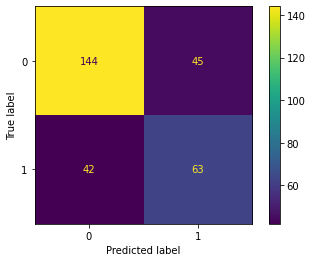

In [11]:
plot_confusion_matrix(reg, scaled_X_test, y_test)

In [12]:
xg_vals = reg.predict_proba(scaled_X_test)[:,1]
xg_vals

array([0.10147694, 0.44342539, 0.3723045 , 0.14160641, 0.09675568,
       0.25657021, 0.25737589, 0.25219264, 0.705113  , 0.20014718,
       0.20576442, 0.0771713 , 0.52397069, 0.38049401, 0.60312672,
       0.32492637, 0.52015623, 0.41983249, 0.65845986, 0.41817909,
       0.15614889, 0.58720551, 0.27680208, 0.46211232, 0.29920109,
       0.27875924, 0.49164254, 0.13340379, 0.76169753, 0.32856389,
       0.73165032, 0.05752868, 0.69149974, 0.76804258, 0.05747075,
       0.16361234, 0.04824018, 0.30728707, 0.37332125, 0.40502562,
       0.25161454, 0.55753262, 0.06364476, 0.27750219, 0.77668642,
       0.31554002, 0.63177328, 0.54541042, 0.69497495, 0.49301769,
       0.38732989, 0.31435027, 0.542988  , 0.36278405, 0.24735159,
       0.02547476, 0.31382295, 0.66277148, 0.21737292, 0.65129078,
       0.22897037, 0.47604978, 0.81206983, 0.04538609, 0.44795094,
       0.70025874, 0.28106749, 0.31206541, 0.51504116, 0.58153236,
       0.74535603, 0.47546504, 0.63039655, 0.3273779 , 0.51254

In [13]:
X_copy = X_test[:, [0,1,2]]

In [14]:
final_vals = np.c_[X_copy, xg_vals*100]

In [15]:
import matplotlib.pyplot as plt

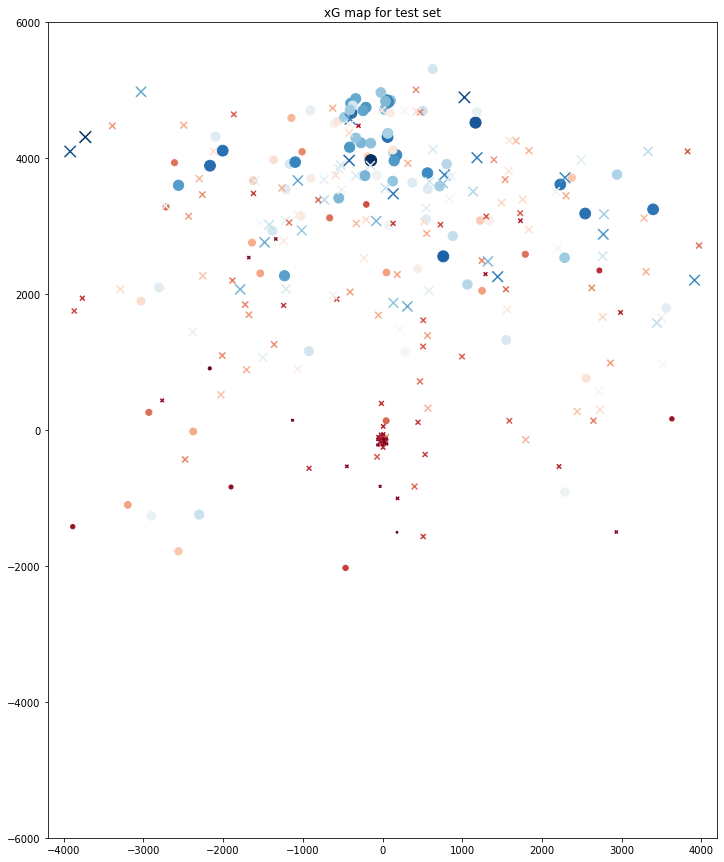

In [16]:
fig = plt.figure(figsize=(12,15))
goals = final_vals[[idx for idx in range(len(y_test)) if y_test[idx] == 1], :]
misses = final_vals[[idx for idx in range(len(y_test)) if y_test[idx] == 0], :]
plt.scatter(goals[:,1], goals[:,2], s=goals[:,3]*1.5, alpha=1, cmap="RdBu", c=goals[:,3], marker='o')
plt.scatter(misses[:,1], misses[:,2], s=misses[:,3]*1.5, alpha=1, cmap="RdBu", c=misses[:,3], marker='x')
# c=["red" if x<50 else "blue" for x in final_vals[:,2]],
plt.ylim([-6000, 6000])
plt.xlim([-4200, 4200])
plt.title("xG map for test set")
plt.show()

In [17]:
eli5.explain_weights_sklearn(reg, feature_names=list(data_filtered.columns[1:-1]))

Weight?,Feature
+1.064,shot_taker_pos_y
+0.428,shot_taker_vel_z
+0.235,shot_taker_vel_y
+0.162,opp_2_rot_y
+0.156,shot_taker_pos_z
+0.149,shot_taker_pos_x
+0.141,shot_taker_ang_vel_y
+0.118,opp_1_vel_y
+0.109,opp_1_rot_x
+0.071,opp_1_pos_z


In [18]:
# find shot in test with highest xG
e = reg.predict_proba(scaled_X_test)[:,1]
e = reg.predict_proba(scaled_X_train)[:,1]
# ind = np.argpartition(e, 0)[-5:]
ind = (-e).argsort()[:50]
ind

array([ 960, 1058,  124,  145,    0,  476,  754,  228, 1116,  348, 1070,
       1061,  792,  493,  638,  369,  678,  112,   61,  901,  934,  538,
        880,  733,   40,  232,  427,  840, 1059,  753, 1079,  209,  777,
        219, 1163,   33,  982,  621,  841,  555,  568,  827,  839,  902,
       1031,  433,  735,  437,  457,  426], dtype=int64)

In [19]:
# ex_shot = 173
# entry = X_test[ex_shot]
is_train = True
for shot_id in ind:
    ex_shot = shot_id
    entry = X_train[shot_id]
    if y_train[shot_id] == 1:
        print(y_train[shot_id], shot_id)
        break
cols = data_filtered.columns.tolist()
shot_idx = cols.index("shot_taker_pos_x")
x_pos = entry[shot_idx]
y_pos = entry[shot_idx+1]
vel_idx = cols.index("shot_taker_vel_x")
x_vel = entry[vel_idx]
y_vel = entry[vel_idx+1]

opp1_idx = cols.index("opp_1_pos_x")
opp_1_x = entry[opp1_idx]
opp_1_y = entry[opp1_idx+1]
opp1_idx = cols.index("opp_1_vel_x")
opp_1_x_vel = entry[opp1_idx]
opp_1_y_vel = entry[opp1_idx+1]

opp2_idx = cols.index("opp_2_pos_x")
opp_2_x = entry[opp2_idx]
opp_2_y = entry[opp2_idx+1]
opp2_idx = cols.index("opp_2_vel_x")
opp_2_x_vel = entry[opp2_idx]
opp_2_y_vel = entry[opp2_idx+1]

shot_id = entry[0]
raw_entry = data[data['idx'] == shot_id].iloc[0]
ball_x = raw_entry['ball_pos_x']
ball_y = raw_entry['ball_pos_y']
ball_x_vel = raw_entry['ball_vel_x']
ball_y_vel = raw_entry['ball_vel_y']
shot_taker_name = raw_entry['shot_taker_name']

tm_x = raw_entry['team_mate_pos_x']
tm_y = raw_entry['team_mate_pos_y']
tm_x_vel = raw_entry['team_mate_vel_x']
tm_y_vel = raw_entry['team_mate_pos_y']

0 0


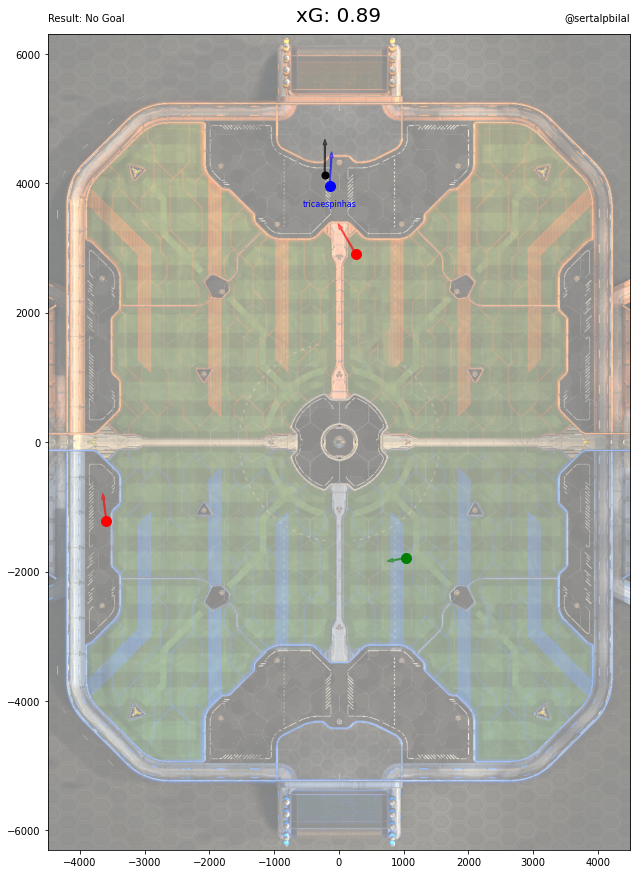

In [20]:
fig, ax = plt.subplots(figsize=(12,15))

# Shot taker
ax.scatter(x_pos, y_pos, c='blue', s=100)
ax.arrow(x_pos, y_pos, x_vel/50, y_vel/50, shape='full', width=20, alpha=0.5, color='blue')
ax.text(x_pos, y_pos - 300, s=shot_taker_name, ha='center', fontsize=8, color='blue')

# Team mate
ax.scatter(tm_x, tm_y, c='green', s=100)
ax.arrow(tm_x, tm_y, tm_x_vel/50, tm_y_vel/50, shape='full', width=20, alpha=0.5, color='green')

# Opposition 1
ax.scatter(opp_1_x, opp_1_y, c='red', s=100)
ax.arrow(opp_1_x, opp_1_y, opp_1_x_vel/50, opp_1_y_vel/50, shape='full', width=20, alpha=0.5, color='red')

# Opposition 2
ax.scatter(opp_2_x, opp_2_y, c='red', s=100)
ax.arrow(opp_2_x, opp_2_y, opp_2_x_vel/50, opp_2_y_vel/50, shape='full', width=20, alpha=0.5, color='red')

# Ball
ax.scatter(ball_x, ball_y, c='black', s=50)
ax.arrow(ball_x, ball_y, ball_x_vel/50, ball_y_vel/50, shape='full', width=20, alpha=0.5, color='black')

# Plot settings & Text
ax.text(4500, 6500, s="@sertalpbilal", ha='right', fontsize=10)
ax.set_ylim([-6300, 6300])
ax.set_xlim([-4500, 4500])
if is_train:
    # pred = "Goal" if reg.predict([scaled_X_train[ex_shot]])[0] == 1 else "No Goal"
    actu = "Goal" if y_train[ex_shot] == 1 else "No Goal"
    xg = round(reg.predict_proba([scaled_X_train[ex_shot]])[0][1],2)
else:
    # pred = "Goal" if reg.predict([scaled_X_test[ex_shot]])[0] == 1 else "No Goal"
    actu = "Goal" if y_test[ex_shot] == 1 else "No Goal"
    xg = round(reg.predict_proba([scaled_X_test[ex_shot]])[0][1],2)
# ax.text(-4633, 6500, s=f'Prediction: {pred}, Result: {actu}')
ax.text(-4500, 6500, s=f'Result: {actu}')
img = plt.imread("../pitch.png")
ax.text(0, 6500, s=f"xG: {xg}", ha='center', fontsize=20)
ax.imshow(img, extent=[-4530, 4633, -6300, 6368], alpha=0.5)

# ax.axline((0,-6000), (0,6000))
# ax.axline((-4000,0), (4000,0))
